# Actividad final curso analitica de datos 💻
# Mario Hernández 🧑
# Especialización en Inteligencia Artificial 🤖
# Universidad Autónoma de Manizales 📚


# **CANCIONES SPOTIFY 2023** 🎼

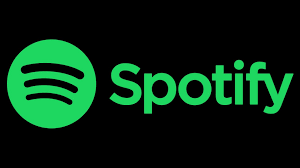

Este conjunto de datos contiene una lista exhaustiva de las canciones más famosas de 2023 que aparecen en Spotify. El conjunto de datos ofrece una gran cantidad de características más allá de lo que suele estar disponible en conjuntos de datos similares. Proporciona información sobre los atributos de cada canción, su popularidad y su presencia en diversas plataformas musicales. El conjunto de datos incluye información como el nombre de la canción, el nombre del artista o artistas, la fecha de lanzamiento, listas de reproducción y listas de Spotify, estadísticas de streaming, presencia en Apple Music, presencia en Deezer, listas de Shazam y varias características de audio.

[Fuente](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/datahttps://)

* track_name: Nombre de la canción
* artist(s)_name: Nombre del artista o artistas
* artist_count: Número de artistas
* released_year: Año de lanzamiento
* released_month: Mes de lanzamiento
* released_day: Día de lanzamiento
* in_spotify_playlists: Número de playlists de Spotify en las que aparece la canción
* in_spotify_charts: Número de veces que la canción ha aparecido en los charts de Spotify
* streams: Número de streams
* in_apple_playlists: Número de playlists de Apple en las que aparece la canción
* in_apple_charts: Número de veces que la canción ha aparecido en los charts de Apple
* in_deezer_playlists: Número de playlists de Deezer en las que aparece la canción
* in_deezer_charts: Número de veces que la canción ha aparecido en los charts de Deezer
* bpm: Beats per minute
* key: Tonalidad
* mode: Modo (mayor o menor)
* danceability_%: Porcentaje de bailabilidad
* valence_%: Porcentaje de positividad
* energy_%: Porcentaje de energía
* acousticness_%: Porcentaje de acústica
* instrumentalness_%: Porcentaje de instrumentalidad
* liveness_%: Porcentaje de viveza
* speechiness_%: Porcentaje de discurso

## Fase 1: Exploración y Limpieza de Datos

Librerias necesarias

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [172]:
#!pip install pandas sqlalchemy sqlite3
import sqlite3


Carga de datos:

In [173]:
#Leer dataset
df = pd.read_csv('/content/spotify-2023 - spotify-2023.csv', encoding='latin-1') #usamos la codificación 'latin-1'

Exploración inicial:

In [174]:
#Tamaño
filas, columans = df.shape
filas, columans

(953, 24)

In [175]:
#Cabeza del dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [177]:
# Información estadistica básica
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [178]:
# Tipos de datos
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

* Detección y manejo de valores faltantes
* Tratamiento de valores atípicos
* Estandarización de formatos

In [179]:
# Intentamos convertir la cantidad de streams a formato numerico
#df['streams'] = pd.to_numeric(df['streams'])

#ValueError: Unable to parse string "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3" at position 574

In [180]:
df.loc[[574]]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [181]:
#Eliminamos esa fila
df = df.drop([574])

In [182]:
#Convertimos a formato numerico
df['streams'] = pd.to_numeric(df['streams'])

In [183]:
# Tipos de datos
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [184]:
#Concatenación del formato para fecha
df['date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                                   df['released_month'].astype(str) + '-' +
                                   df['released_day'].astype(str))

#Eliminamos las columnas originales
df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [185]:
#Confirmamos la creación de la nueva columna para la fecha
df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [186]:
#Revisamos si hay filas repetidas o duplicadas en general
df.duplicated().sum()

0

In [187]:
#Hacemos lo mismo pero especificando el proceso para la columna 'track_name'
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,...,G#,Major,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,...,D,Major,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,...,C#,Major,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,...,G#,Major,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,...,A#,Minor,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,...,D#,Major,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,...,NaN,Major,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,...,NaN,Minor,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,...,NaN,Major,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,...,A,Major,66,24,58,17,0,19,5,1982-05-16


In [188]:
#Revisamos los casos
df[df['track_name'] == 'SNAP']

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
178,SNAP,Rosa Linn,1,3202,18,726307468,148,80,226,24,...,NaN,Major,56,53,64,11,0,45,6,2022-03-19
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,...,NaN,Major,56,52,64,11,0,45,7,2022-03-19


In [189]:
#Ordenamos el dataset por streams de mayor a menor cantidad de reproducciones
df = df.sort_values(by='streams', ascending=False)

In [190]:
#Eliminamos los duplicados en los nombres de las canciones
df = df.drop_duplicates(subset='track_name', keep='first')

In [191]:
#Revisamos si existen más duplicados
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date


In [192]:
#Revisamos los valores faltantes
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     92
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
date                     0
dtype: int64


In [193]:
#Eliminamos lás métricas en shazam
df.drop(columns = ['in_shazam_charts'], inplace = True)

In [194]:
#Completamos los campos key especificando que no hay un valor en el data set para la tonalidad de esas canciones
df['key'] = df['key'].fillna('No especificado')

In [195]:
#Revisamos los valores faltantes
print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
date                    0
dtype: int64


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  bpm                   942 non-null    int64         
 11  key                   942 non-null    object        
 12  mode                  942 non-null    object        
 13  danceability_%        94

In [197]:
#Intentamos convertir a formato numerico los playlist para deezeer
#df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])
#ValueError: Unable to parse string "2,445" at position 48

In [198]:
#Quitamos las comas
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

#Convertimos a formato numerico
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  bpm                   942 non-null    int64         
 11  key                   942 non-null    object        
 12  mode                  942 non-null    object        
 13  danceability_%        94

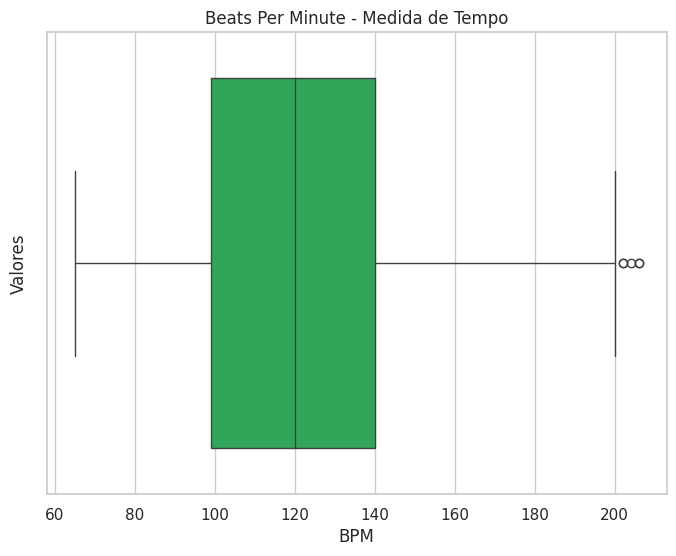

In [200]:
spotify_green = '#1DB954'

# Configuramos el estilo
sns.set(style="whitegrid")
palette = [spotify_green]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bpm'], palette=palette)

plt.title('Beats Per Minute - Medida de Tempo')
plt.xlabel('BPM')
plt.ylabel('Valores')

# Mostrar la gráfica
plt.show()

In [201]:
#Cálculo de z-score
z_scores = stats.zscore(df['bpm'])

print(z_scores[:10])  # Imprimir los primeros 10 z-scores como ejemplo

#Interpretación: Un z-score mayor a 3 o menor a -3 generalmente se considera como un valor atípico

55     1.731657
179   -0.939090
86    -0.440550
620   -0.867870
41    -1.152749
162   -0.654210
84     1.696047
140    0.093599
725   -0.974700
48     2.265806
Name: bpm, dtype: float64


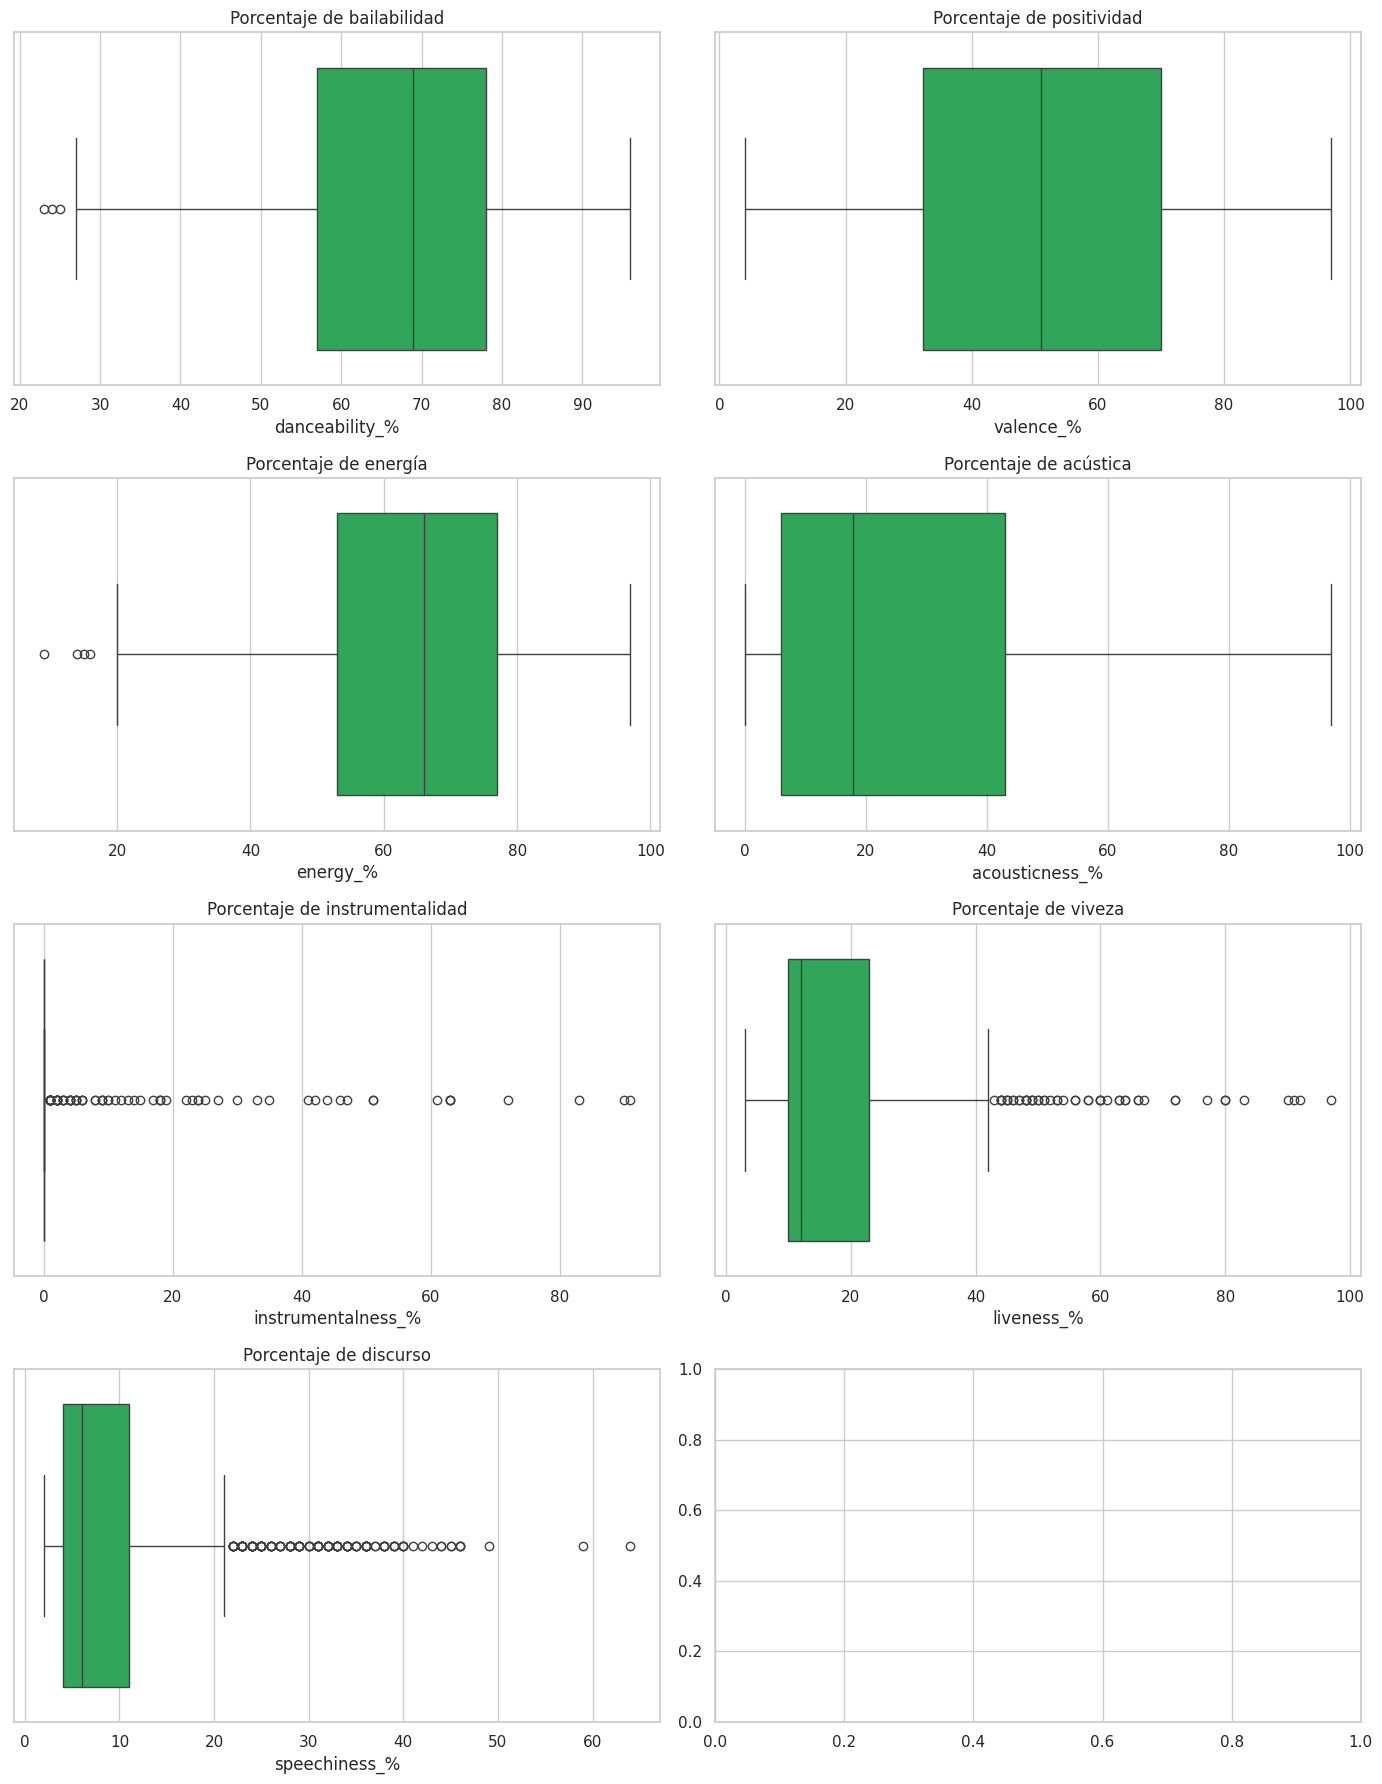

In [202]:

# Definir el color verde de Spotify
spotify_green = '#1DB954'

# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")
palette = [spotify_green]

# Crear gráficos
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))

sns.boxplot(x=df['danceability_%'], ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Porcentaje de bailabilidad')

sns.boxplot(x=df['valence_%'], ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Porcentaje de positividad')

sns.boxplot(x=df['energy_%'], ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Porcentaje de energía')

sns.boxplot(x=df['acousticness_%'], ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Porcentaje de acústica')

sns.boxplot(x=df['instrumentalness_%'], ax=axs[2, 0], palette=palette)
axs[2, 0].set_title('Porcentaje de instrumentalidad')

sns.boxplot(x=df['liveness_%'], ax=axs[2, 1], palette=palette)
axs[2, 1].set_title('Porcentaje de viveza')

sns.boxplot(x=df['speechiness_%'], ax=axs[3, 0], palette=palette)
axs[3, 0].set_title('Porcentaje de discurso')

plt.tight_layout()
plt.show()

In [203]:
df.to_csv('spotify_2023_Limpio.csv')

## Fase 2: Análisis Descriptivo



Análisis de distribuciones:

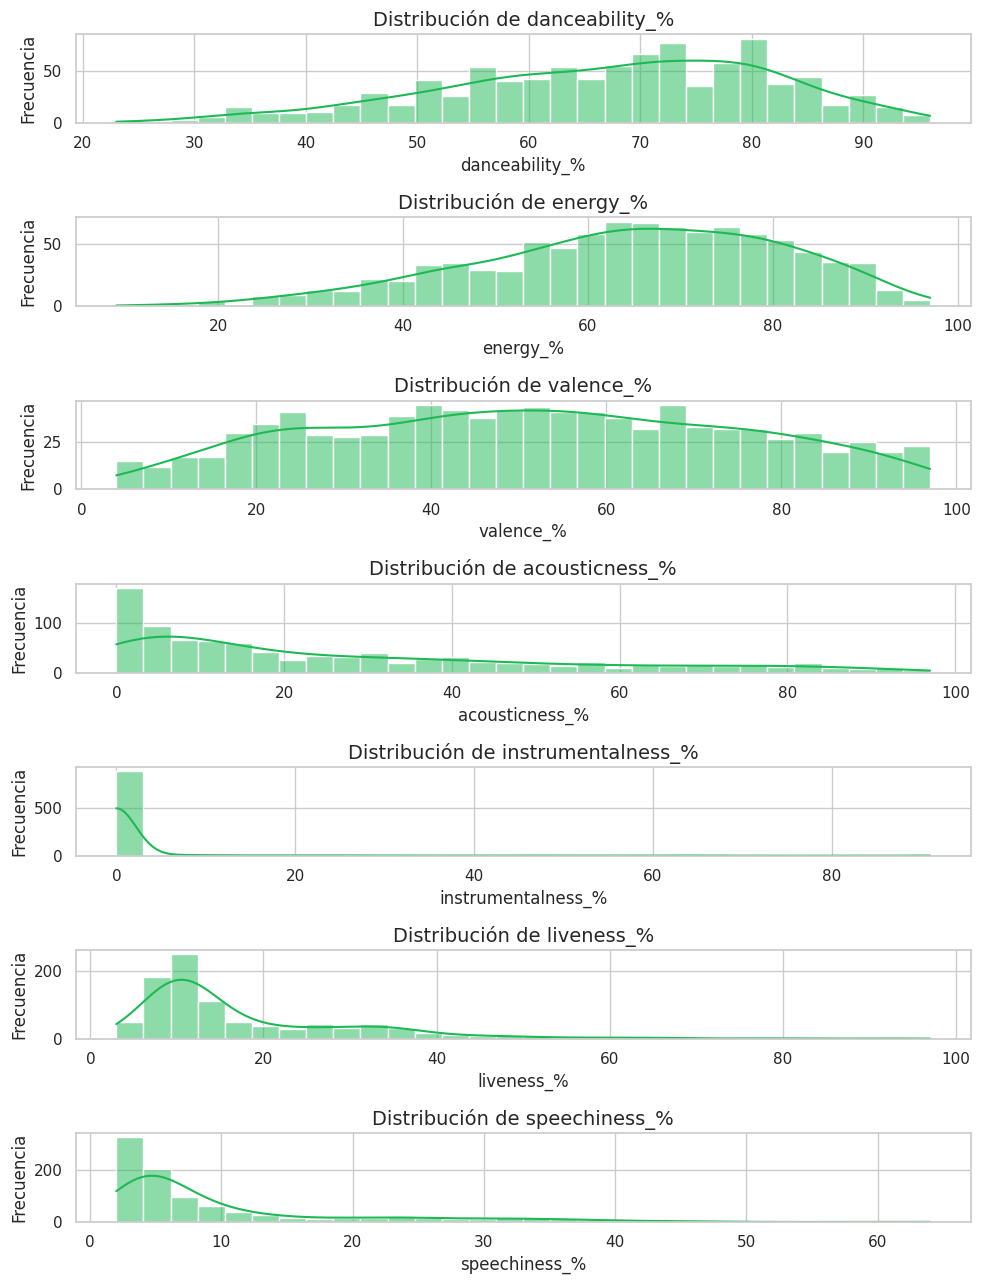

In [204]:
# Configuramos el estilo y los colores
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#1DB954", "#1ED760", "#1ED760", "#25CCF7", "#55E6C1", "#6C5CE7", "#7B1FA2"]))

# Lista de características para visualizar
features_to_visualize = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Configurar la figura y los ejes
fig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(10, 13))

# Graficar la distribución para cada característica
for i, feature in enumerate(features_to_visualize):
    sns.histplot(df[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribución de {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

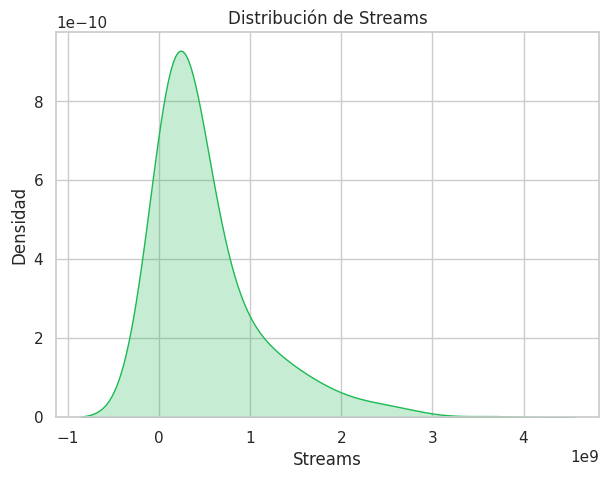

In [205]:
plt.figure(figsize=(7, 5))
sns.kdeplot(df['streams'], bw_method=0.5, kernel='gau', cmap='Greens', shade=True) #gráfico de densidad con la suavidad de 0.5 y kernel gaussiano
plt.title('Distribución de Streams')
plt.xlabel('Streams')
plt.ylabel('Densidad')
plt.show()

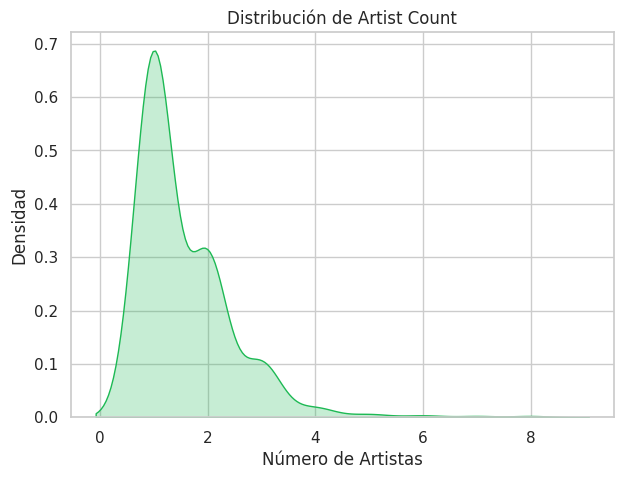

In [206]:
plt.figure(figsize=(7, 5))
sns.kdeplot(df['artist_count'], bw_method=0.4, kernel='gau', cmap='Greens', shade=True) #gráfico de densidad con la suavidad de 0.5 y kernel gaussiano
plt.title('Distribución de Artist Count')
plt.xlabel('Número de Artistas')
plt.ylabel('Densidad')
plt.show()

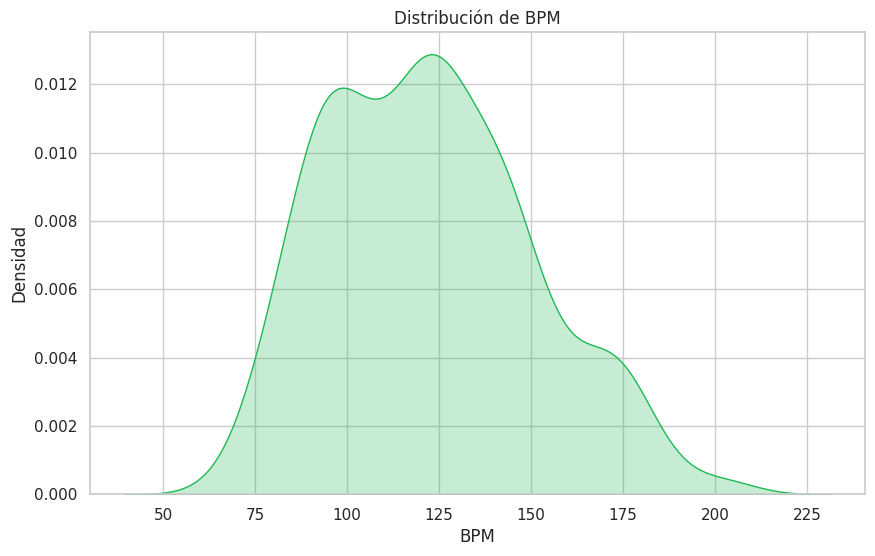

In [207]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['bpm'],  bw_method=0.3, kernel='gau', cmap='Greens', shade=True) #gráfico de densidad con la suavidad de 0.5 y kernel gaussiano
plt.title('Distribución de BPM')
plt.xlabel('BPM')
plt.ylabel('Densidad')
plt.show()

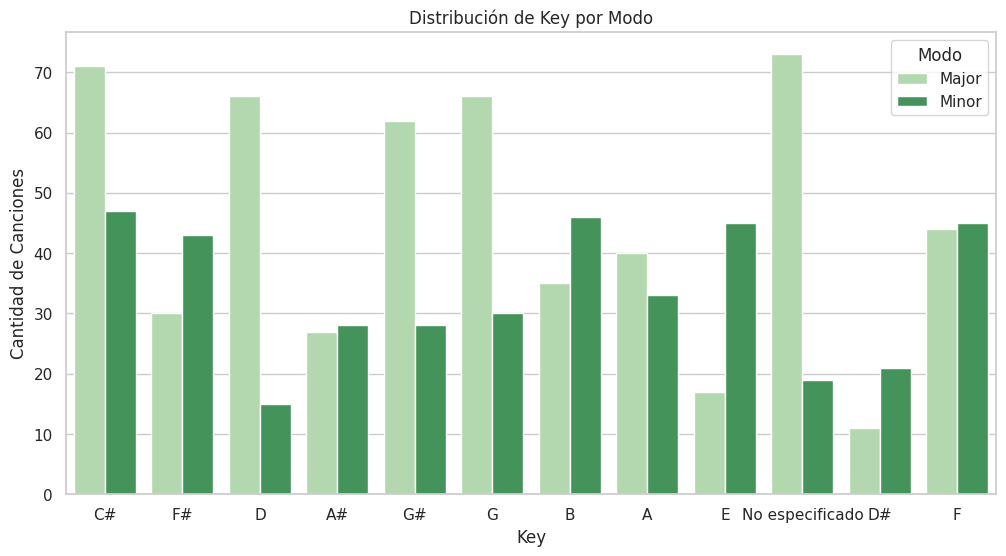

In [208]:
# Ejemplo de countplot con hue para key
plt.figure(figsize=(12, 6))
sns.countplot(x='key', hue='mode', data=df, palette='Greens')
plt.title('Distribución de Key por Modo')
plt.xlabel('Key')
plt.ylabel('Cantidad de Canciones')
plt.legend(title='Modo', loc='upper right')
plt.show()

Análisis de correlaciones:

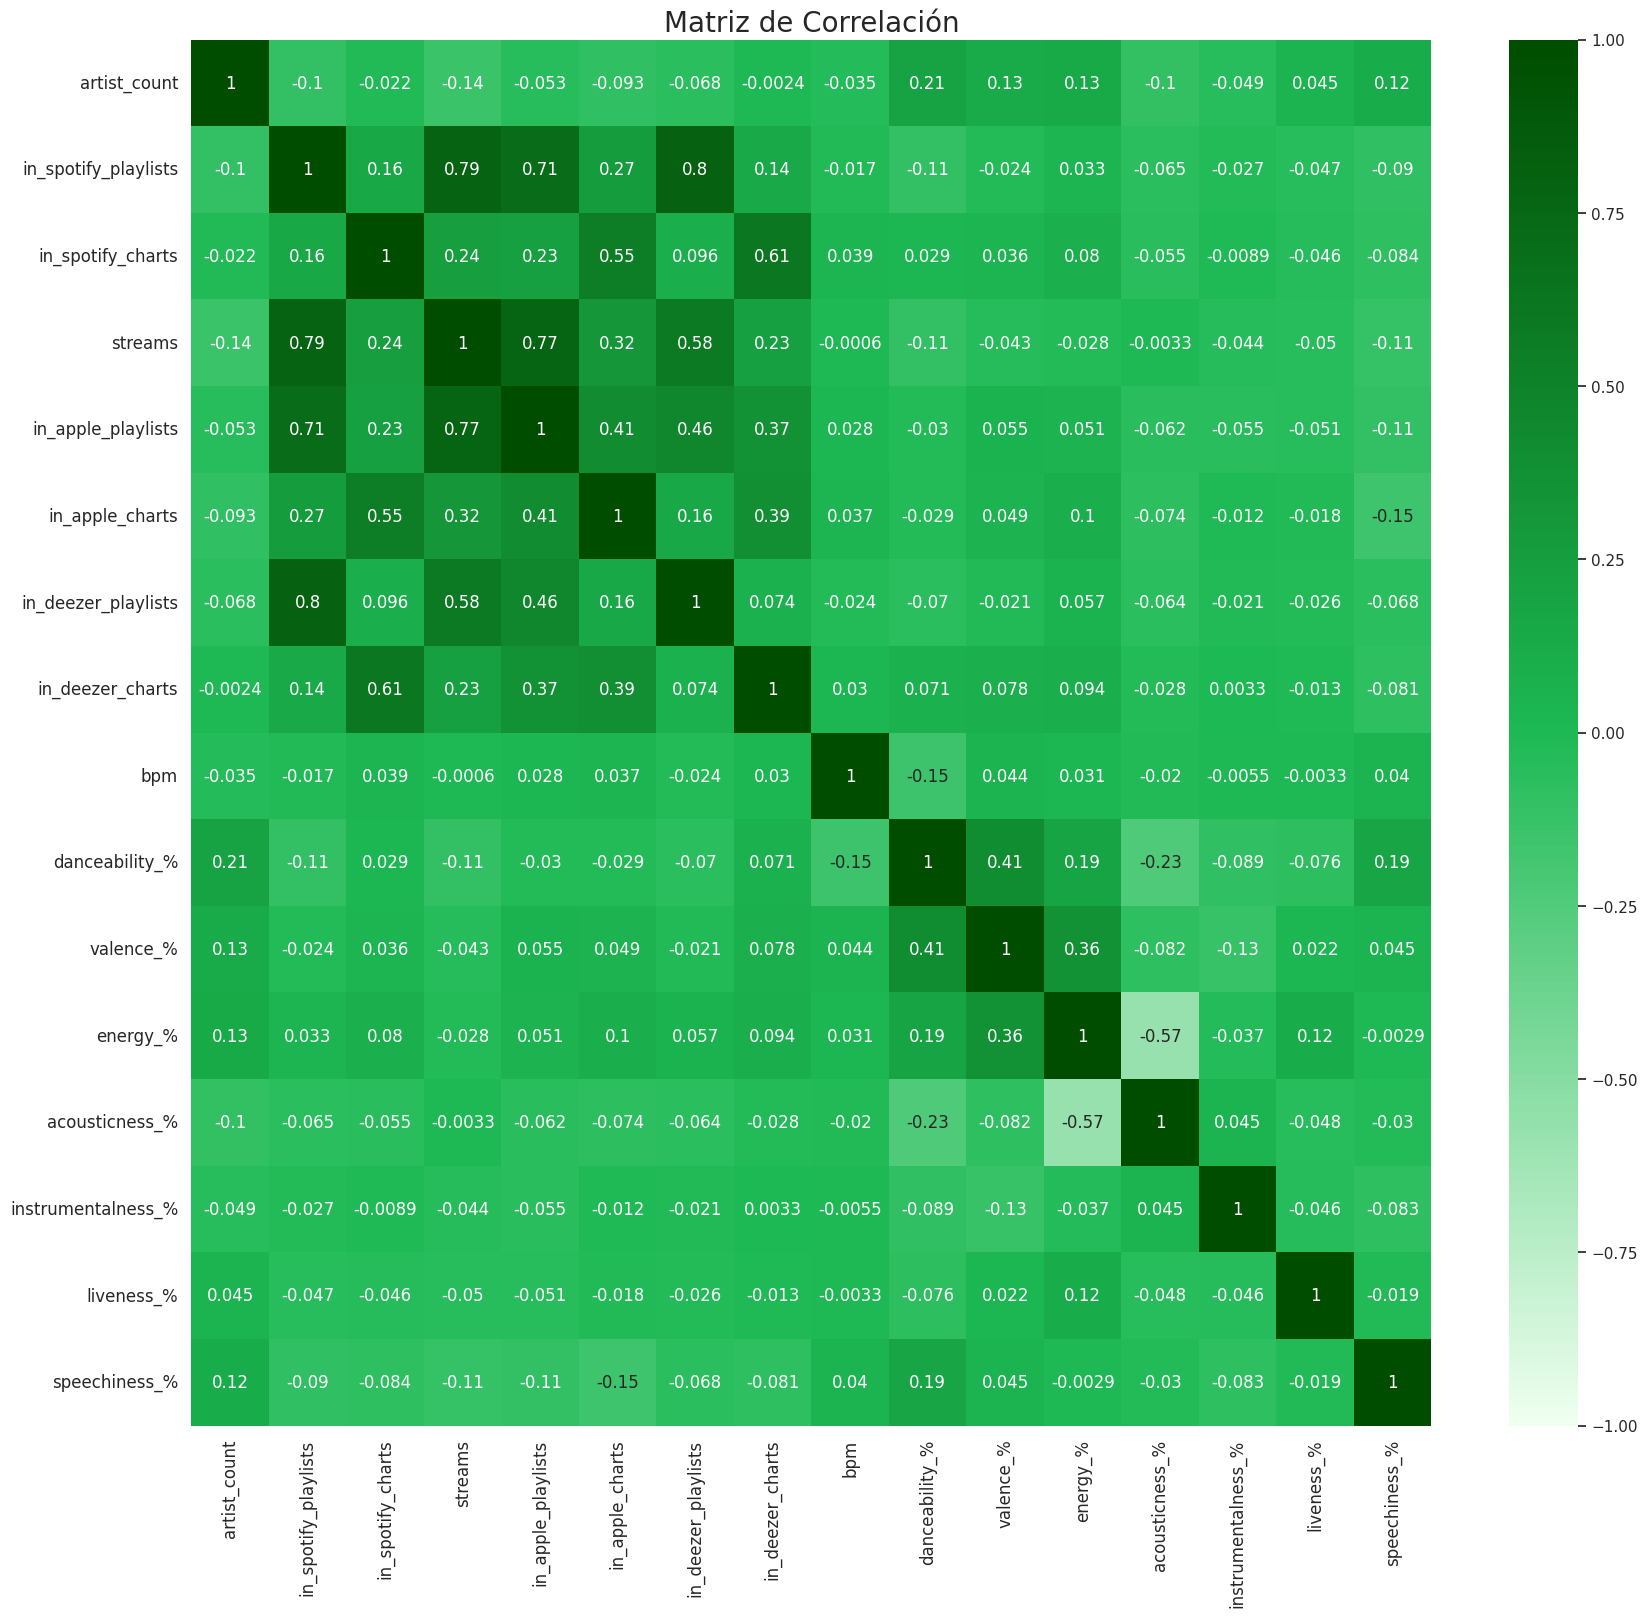

In [209]:
# Seleccionamos solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Matriz de correlación
correlation_matrix = numeric_columns.corr()

# Personalizamos el color
cmap = LinearSegmentedColormap.from_list('spotify', ['#f0fff0', '#1DB954', '#004d00'], N=256)

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

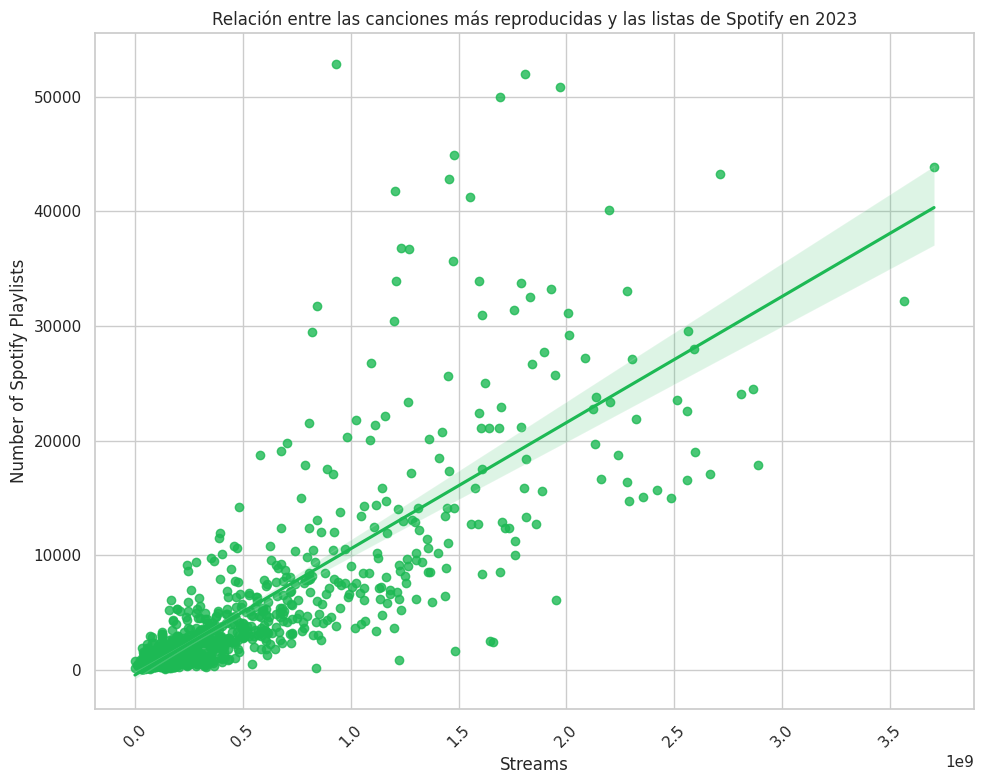

In [210]:
# Elegimos el color
spotify_green = '#1DB954'

plt.figure(figsize=(10, 8))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    x='streams',
    y='in_spotify_playlists',
    data=df,
    scatter_kws={'color': spotify_green},
    line_kws={'color': spotify_green}
)

plt.title('Relación entre las canciones más reproducidas y las listas de Spotify en 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

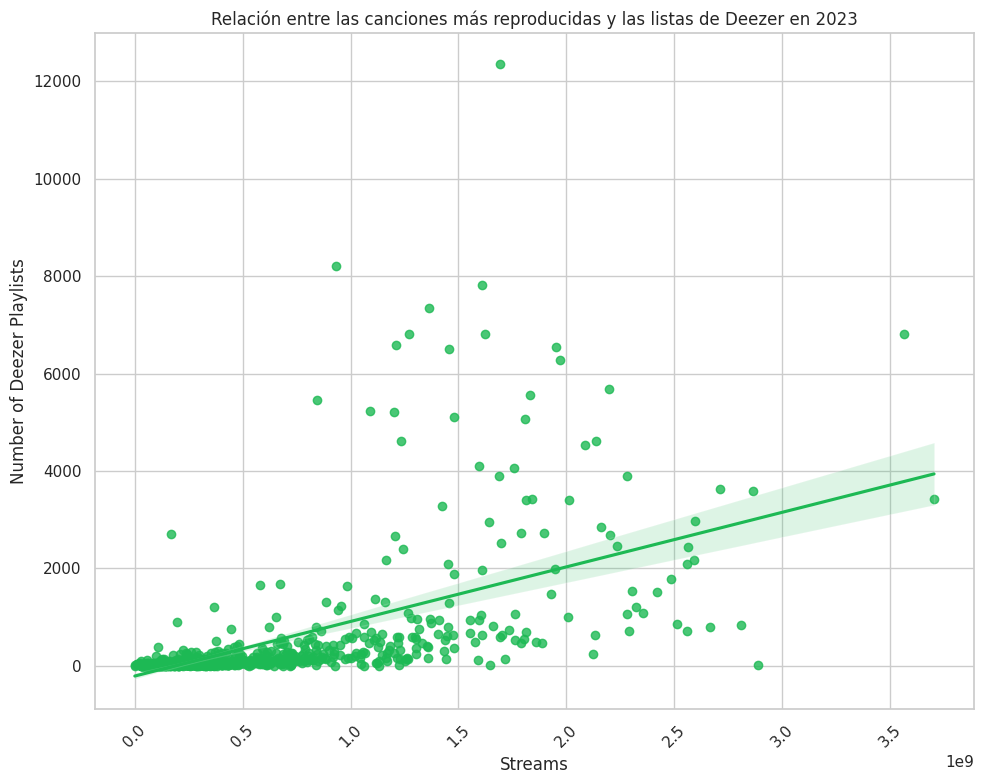

In [211]:
# Elegimos el color
spotify_green = '#1DB954'

plt.figure(figsize=(10, 8))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    x='streams',
    y='in_deezer_playlists',
    data=df,
    scatter_kws={'color': spotify_green},
    line_kws={'color': spotify_green}
)

plt.title('Relación entre las canciones más reproducidas y las listas de Deezer en 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

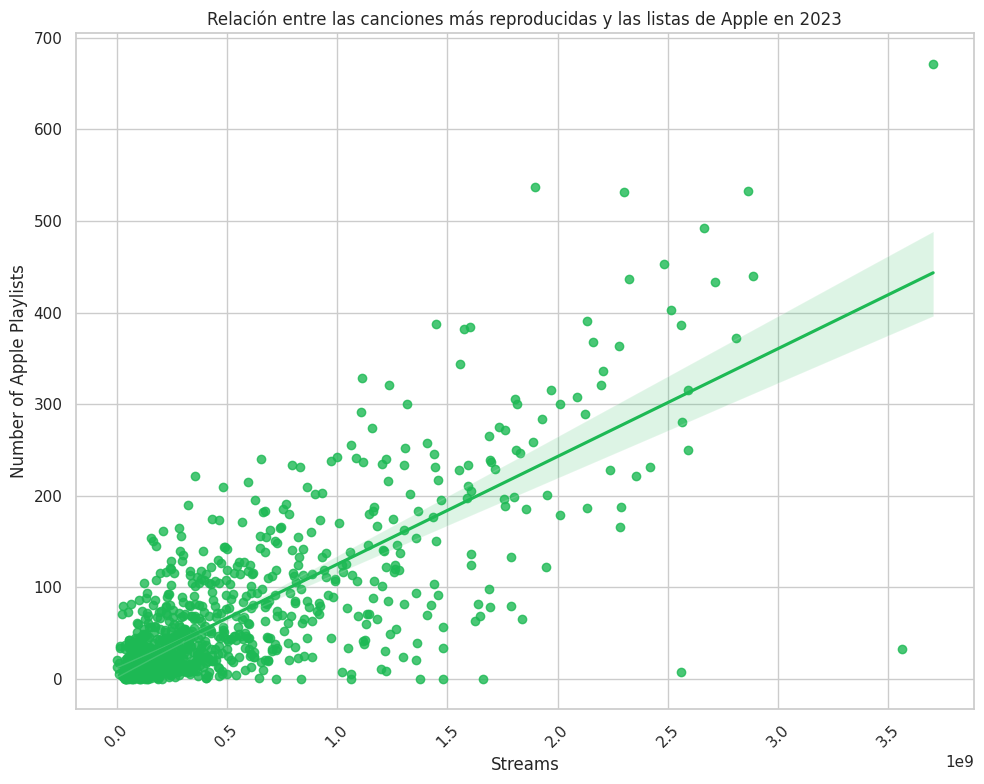

In [212]:
# Elegimos el color
spotify_green = '#1DB954'

plt.figure(figsize=(10, 8))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    x='streams',
    y='in_apple_playlists',
    data=df,
    scatter_kws={'color': spotify_green},
    line_kws={'color': spotify_green}
)

plt.title('Relación entre las canciones más reproducidas y las listas de Apple en 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Fase 3: Integración con Bases de Datos


In [213]:
# Extraemos solo los nombres de los artistas para el ejercicio con SQL
artist_names = df['artist(s)_name'].str.split(', ').explode()

# Creamos un df con los datos
artist_df = pd.DataFrame(artist_names, columns=['artist_name'])

# Guardamos en un archivo Excel por comodidad
artist_df.to_excel('artist_names.xlsx', index=False)

Cargamos la extensión de SQL para colab:

In [214]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [215]:
#Llamamos a sqlite
%sql sqlite://

In [216]:
#Creamos la tabla
%%sql
CREATE TABLE IF NOT EXISTS spotify (
    id INTEGER PRIMARY KEY,
    artista TEXT NOT NULL,
    pais TEXT
);


 * sqlite://
Done.


[]

In [217]:
#Agregamos información a la tabla que creamos
%%sql
INSERT INTO spotify (artista, pais)
VALUES
('Latto','Estados Unidos'),
('Jung Kook','Corea del Sur'),
('Myke Towers','Puerto Rico'),
('Olivia Rodrigo','Estados Unidos'),
('Taylor Swift','Estados Unidos'),
('Bad Bunny','Puerto Rico'),
('Dave','Reino Unido'),
('Central Cee','Reino Unido'),
('Eslabon Armado','Estados Unidos'),
('Peso Pluma','México'),
('Quevedo','España'),
('Gunna','Estados Unidos'),
('Yng Lvcas','México'),
('Grupo Frontera','Estados Unidos'),
('NewJeans','Corea del Sur'),
('Miley Cyrus','Estados Unidos'),
('David Kushner','Estados Unidos'),
('Harry Styles','Reino Unido'),
('SZA','Estados Unidos'),
('Fifty Fifty','Corea del Sur'),
('Billie Eilish','Estados Unidos'),
('Feid','Colombia'),
('Young Miko','Puerto Rico'),
('Jimin','Corea del Sur'),
('Gabito Ballesteros','México'),
('Junior H','México'),
('Arctic Monkeys','Reino Unido'),
('Bizarrap','Argentina'),
('The Weeknd','Canadá'),
('Madonna','Estados Unidos'),
('Playboi Carti','Estados Unidos'),
('Fuerza Regida','Estados Unidos'),
('Rema','Nigeria'),
('Selena Gomez','Estados Unidos'),
('Tainy','Puerto Rico'),
('Morgan Wallen','Estados Unidos'),
('Dua Lipa','Reino Unido'),
('Troye Sivan','Australia'),
('21 Savage','Reino Unido'),
('Metro Boomin','Estados Unidos'),
('Karol G','Colombia'),
('Shakira','Colombia'),
('Big One','Argentina'),
('Duki','Argentina'),
('Lit Killah','Argentina'),
('Maria Becerra','Argentina'),
('FMK','Argentina'),
('Rusherking','Argentina'),
('Emilia','Argentina'),
('Tiago PZK','Argentina'),
('Yahritza Y Su Esencia','Estados Unidos'),
('Post Malone','Estados Unidos'),
('Swae Lee','Estados Unidos'),
('Bebe Rexha','Estados Unidos'),
('David Guetta','Francia'),
('Tyler, The Creator','Estados Unidos'),
('Kali Uchis','Estados Unidos'),
('Nicki Minaj','Trinidad y Tobago'),
('Aqua','Dinamarca'),
('Ice Spice','Estados Unidos'),
('OneRepublic','Estados Unidos'),
('Ariana Grande','Estados Unidos'),
('Sky Rompiendo','Colombia'),
('Anne-Marie','Reino Unido'),
('Coi Leray','Estados Unidos'),
('Peggy Gou','Corea del Sur'),
('Tom Odell','Reino Unido'),
('Manuel Turizo','Colombia'),
('dennis','Brasil'),
('MC Kevin o Chris','Brasil'),
('PinkPantheress','Reino Unido'),
('Charlie Puth','Estados Unidos'),
('BTS','Corea del Sur'),
('Rauw Alejandro','Puerto Rico'),
('ROSALÍA','España'),
('Ozuna','Puerto Rico'),
('Chris Molitor','Estados Unidos'),
('Libianca','Estados Unidos'),
('Glass Animals','Reino Unido'),
('JVKE','Estados Unidos'),
('The Neighbourhood','Estados Unidos'),
('Coldplay','Reino Unido'),
('d4vd','Estados Unidos'),
('Sam Smith','Reino Unido'),
('Kim Petras','Alemania'),
('Yandel','Puerto Rico'),
('Vance Joy','Australia'),
('Em Beihold','Estados Unidos'),
('Stephen Sanchez','Estados Unidos'),
('Mc Livinho','Brasil'),
('DJ Matt D','Brasil'),
('Marshmello','Estados Unidos'),
('Lewis Capaldi','Reino Unido'),
('Chencho Corleone','Puerto Rico'),
('Jain','Francia'),
('Ayparia','Rusia'),
('unxbected','Rusia'),
('Luke Combs','Estados Unidos'),
('Doechii','Estados Unidos'),
('J. Cole','Estados Unidos'),
('Lil Durk','Estados Unidos'),
('Lana Del Rey','Estados Unidos'),
('Future','Estados Unidos'),
('Don Toliver','Estados Unidos'),
('Eminem','Estados Unidos'),
('Carin Leon','México'),
('Elton John','Reino Unido'),
('Pnau','Australia'),
('Ruth B.','Canadá'),
('Imagine Dragons','Estados Unidos'),
('Adele','Reino Unido'),
('Kendrick Lamar','Estados Unidos'),
('Jay Rock','Estados Unidos'),
('Anggi Marito','Indonesia'),
('Jasiel Nuñez','México'),
('Tears For Fears','Reino Unido'),
('Loreen','Suecia'),
('Taiu','Argentina'),
('Milo j','Argentina'),
('Sebastian Yatra','Colombia'),
('Beéle','Colombia'),
('Calvin Harris','Reino Unido'),
('Ellie Goulding','Reino Unido'),
('Sabrina Carpenter','Estados Unidos'),
('Ray Dalton','Estados Unidos'),
('Ryan Lewis','Estados Unidos'),
('Macklemore','Estados Unidos'),
('Khalid','Estados Unidos'),
('(G)I-DLE','Corea del Sur'),
('Swae Lee','Estados Unidos'),
('A Boogie Wit da Hoodie','Estados Unidos'),
('NAV','Canadá'),
('Travis Scott','Estados Unidos'),
('Young Thug','Estados Unidos'),
('Sachin-Jigar','India'),
('Shadab Faridi','India'),
('Altamash Faridi','India'),
('Amitabh Bhattacharya','India'),
('Varun Jain','India'),
('Ed Sheeran','Reino Unido'),
('Veigh','Brasil'),
('Bvga Beatz','Brasil'),
('Supernova Ent','Brasil'),
('Prod Malax','Brasil'),
('Mc Pedrinho','Brasil'),
('DJ 900','Brasil'),
('Sog','México'),
('Ryan Castro','Colombia'),
('Bomba Estéreo','Colombia'),
('Keane','Reino Unido'),
('New West','Estados Unidos'),
('Chino Pacas','México'),
('Natanael Cano','México'),
('Don Omar','Puerto Rico'),
('Lucenzo','Portugal'),
('Ana Castela','Brasil'),
('AgroPlay','Brasil'),
('Bruno Mars','Estados Unidos'),
('Drake','Canadá'),
('OneRepublic','Estados Unidos'),
('Justin Bieber','Canadá'),
('Chris Brown','Estados Unidos'),
('Daddy Yankee','Puerto Rico'),
('WizKid','Nigeria'),
('Kyla','Filipinas'),
('Miguel','Estados Unidos'),
('The Police','Reino Unido'),
('Lord Huron','Estados Unidos'),
('Rihanna','Barbados'),
('Alec Benjamin','Estados Unidos'),
('A$AP Rocky','Estados Unidos'),
('Roisee','Francia'),
('YOASOBI','Japón'),
('Rosa Linn','Armenia'),
('One Direction','Reino Unido'),
('Oscar Maydon','México'),
('Radiohead','Reino Unido'),
('James Arthur','Reino Unido'),
('Cigarettes After Sex','Estados Unidos'),
('Shubh','India'),
('Frank Ocean','Estados Unidos'),
('Hozier','Irlanda'),
('Hotel Ugly','Estados Unidos'),
('Creedence Clearwater Revival','Estados Unidos'),
('Plan B','Puerto Rico'),
('Mora','Puerto Rico'),
('Saiko','Chile'),
('a-ha','Noruega'),
('Kodak Black','Estados Unidos'),
('NLE Choppa','Estados Unidos'),
('Muni Long','Estados Unidos'),
('Stray Kids','Corea del Sur'),
('Eden Muñoz','México'),
('Abhijay Sharma','India'),
('Riar Saab','India'),
('Semicenk','Turquía'),
('Dogu Swag','Turquía'),
('JISOO','Corea del Sur'),
('Lil Uzi Vert','Estados Unidos'),
('RAYE','Reino Unido'),
('070 Shake','Estados Unidos'),
('Arcangel','Puerto Rico'),
('ENHYPEN','Corea del Sur'),
('Israel & Rodolffo','Brasil'),
('Mari Fernandez','Brasil'),
('Steve Lacy','Estados Unidos'),
('Beyoncé','Estados Unidos'),
('Halsey','Estados Unidos'),
('Suga','Corea del Sur'),
('Nicky Jam','Estados Unidos'),
('Sean Paul','Jamaica'),
('Tini','Argentina'),
('Sia','Australia'),
('Offset','Estados Unidos'),
('JID','Estados Unidos'),
('Zé Neto & Cristiano','Brasil'),
('Migrantes','Chile'),
('LiL CaKe','Chile'),
('Nico Valdi','Chile'),
('Tory Lanez','Canadá'),
('Joji','Japón'),
('Mambo Kingz','Puerto Rico'),
('DJ Luian','Puerto Rico'),
('Anuel AA','Puerto Rico'),
('Nile Rodgers','Estados Unidos'),
('LE SSERAFIM','Corea del Sur'),
('Agust D','Corea del Sur'),
('Rich The Kid','Estados Unidos'),
('Matue','Brasil'),
('Labrinth','Reino Unido'),
('Lizzy McAlpine','Estados Unidos'),
('IVE','Corea del Sur'),
('Cartel De Santa','México'),
('La Kelly','México'),
('SEVENTEEN','Corea del Sur'),
('TAEYANG','Corea del Sur'),
('Lisa','Tailandia'),
('Raim Laode','Indonesia'),
('Meghan Trainor','Estados Unidos'),
('ARIZONATEARS','Estados Unidos'),
('TV Girl','Estados Unidos'),
('INTERWORLD','Rusia'),
('Jhayco','Puerto Rico'),
('El Chachito','México'),
('Gesaffelstein','Francia'),
('RM','Corea del Sur'),
('Colde','Corea del Sur'),
('BLACKPINK','Corea del Sur'),
('Nengo Flow','Puerto Rico'),
('Nicky Youre','Estados Unidos'),
('Dazy','Estados Unidos'),
('Dina Rae','Estados Unidos'),
('IU','Corea del Sur'),
('PR1ISVX','Estados Unidos'),
('Marilía Mendoca','Brasil'),
('Zach Bryan','Estados Unidos'),
('Melanie Martinez','Estados Unidos'),
('Mae Stephens','Reino Unido'),
('Kenia OS','México'),
('Kordhell','Finlandia'),
('Coolio','Estados Unidos'),
('L.V.','Estados Unidos'),
('Ovy On The Drums','Colombia'),
('The Walters','Estados Unidos'),
('Mac DeMarco','Canadá'),
('Jack Black','Estados Unidos'),
('NICKI NICOLE','Argentina'),
('Cris Mj','Chile'),
('Standly','Chile'),
('Stars Music Chile','Chile'),
('Brray','Puerto Rico'),
('Lyanno','Puerto Rico'),
('Linkin Park','Estados Unidos'),
('Gorillaz','Reino Unido'),
('j-hope','Corea del Sur'),
('Robin Schulz','Alemania'),
('Oliver Tree','Estados Unidos'),
('Eric Church','Estados Unidos'),
('Kaifi Khalil','Pakistán'),
('Lady Gaga','Estados Unidos'),
('Leo Santana','Brasil'),
('Treyce','Estados Unidos'),
('Doja Cat','Estados Unidos'),
('MC Xenon','Brasil'),
('Os Gemeos da Putaria','Brasil'),
('League of Legends','Estados Unidos'),
('XXXTENTACION','Estados Unidos'),
('Yuridia','México'),
('Angela Aguilar','Estados Unidos'),
('The Kid Laroi','Australia'),
('Lizzo','Estados Unidos'),
('Fujii Kaze','Japón'),
('Wisin & Yandel','Puerto Rico'),
('King','India'),
('P!nk','Estados Unidos'),
('Baby Tate','Estados Unidos'),
('Vishal Dadlani','India'),
('Sukriti Kakar','India'),
('Vishal-Shekhar','India'),
('Shekhar Ravjiani','India'),
('Kumaar','India'),
('Beach House','Estados Unidos'),
('FIFA Sound','Suiza'),
('Conan Gray','Estados Unidos'),
('Shilpa Rao','India'),
('Caralisa Monteiro','India'),
('TOMORROW X TOGETHER','Corea del Sur'),
('Tems','Nigeria'),
('Mr.Kitty','Estados Unidos'),
('Gustavo Mioto','Brasil'),
('Elley Duhé','Estados Unidos'),
('Seafret','Reino Unido'),
('Baby Rasta','Puerto Rico'),
('DJ Escobar','Brasil'),
('MC MENOR SG','Brasil'),
('MC MENOR HR','Brasil'),
('Dean Lewis','Australia'),
('Bellakath','México'),
('Skrillex','Estados Unidos'),
('Flowdan','Reino Unido'),
('Fred again..','Reino Unido'),
('Kate Bush','Reino Unido'),
('Aerosmith','Estados Unidos'),
('Freddie Dredd','Canadá'),
('Lost Frequencies','Bélgica'),
('Calum Scott','Reino Unido'),
('Twisted','Estados Unidos'),
('Kenshi Yonezu','Japón'),
('Omar Apollo','Estados Unidos'),
('DaBaby','Estados Unidos'),
('James Hype','Reino Unido'),
('Miggy Dela Rosa','Reino Unido'),
('Pritam','India'),
('Styrx','Turquía'),
('utku INC','Turquía'),
('Thezth','Turquía'),
('Maroon 5','Estados Unidos'),
('Wiz Khalifa','Estados Unidos'),
('Mariah Carey','Estados Unidos'),
('Wham!','Reino Unido'),
('Brenda Lee','Estados Unidos'),
('Bobby Helms','Estados Unidos'),
('Michael Bublé','Canadá'),
('Andy Williams','Estados Unidos'),
('Dean Martin','Estados Unidos'),
('Kelly Clarkson','Estados Unidos'),
('José Feliciano','Puerto Rico'),
('John Lennon','Reino Unido'),
('The Harlem Community Choir','Estados Unidos'),
('The Plastic Ono Band','Reino Unido'),
('Yoko Ono','Japón'),
('Phoebe Bridgers','Estados Unidos'),
('Burl Ives','Estados Unidos'),
('Nat King Cole','Estados Unidos'),
('Paul McCartney','Reino Unido'),
('Band Aid','Reino Unido'),
('Shakin Stevens','Reino Unido'),
('Bing Crosby','Estados Unidos'),
('John Scott Trotter & His Orchestra','Estados Unidos'),
('Ken Darby Singers','Estados Unidos'),
('Chris Rea','Reino Unido'),
('Darlene Love','Estados Unidos'),
('Perry Como','Estados Unidos'),
('The Fontane Sisters','Estados Unidos'),
('Mitchell Ayres & His Orchestra','Estados Unidos'),
('Britney Spears','Estados Unidos'),
('Mabel Matiz','Turquía'),
('Mert Demir','Turquía'),
('Gwen Stefani','Estados Unidos'),
('Blake Shelton','Estados Unidos'),
('Chuck Berry','Estados Unidos'),
('Frank Sinatra','Estados Unidos'),
('John Legend','Estados Unidos'),
('Maldy','Puerto Rico'),
('Gayle','Estados Unidos'),
('Lauren Spencer Smith','Canadá'),
('Cherish','Estados Unidos'),
('ACRAZE','Estados Unidos'),
('Adassa','Estados Unidos'),
('Mauro Castillo','Colombia'),
('Stephanie Beatriz','Estados Unidos'),
('Encanto - Cast','Estados Unidos'),
('Rhenzy Feliz','Estados Unidos'),
('Diane Guerrero','Estados Unidos'),
('Carolina Gaitan','Colombia'),
('Farruko','Puerto Rico'),
('Jaymes Young','Estados Unidos'),
('Jessica Darrow','Estados Unidos');


 * sqlite://
388 rows affected.


[]

 Consultas SQL:

In [218]:
# Visualizamos la tabla que creamos
%sql SELECT * FROM spotify LIMIT 6;

 * sqlite://
Done.


id,artista,pais
1,Latto,Estados Unidos
2,Jung Kook,Corea del Sur
3,Myke Towers,Puerto Rico
4,Olivia Rodrigo,Estados Unidos
5,Taylor Swift,Estados Unidos
6,Bad Bunny,Puerto Rico


In [219]:
%%sql
SELECT artista, COUNT(*) AS cantidad
FROM spotify
GROUP BY artista
HAVING COUNT(*) > 1;

 * sqlite://
Done.


artista,cantidad
(G)I-DLE,2
070 Shake,2
21 Savage,2
A Boogie Wit da Hoodie,2
A$AP Rocky,2
ACRAZE,2
ARIZONATEARS,2
Abhijay Sharma,2
Adassa,2
Adele,2


In [220]:
# Borramos los duplicados
%%sql
DELETE FROM spotify
WHERE id NOT IN (
    SELECT MIN(id)
    FROM spotify
    GROUP BY artista
);

 * sqlite://
388 rows affected.


[]

In [221]:
#Agrupamos los artistas por pais, en este caso aquellos que son de Colombia
%%sql
SELECT * FROM spotify
WHERE pais = 'Colombia';

 * sqlite://
Done.


id,artista,pais
22,Feid,Colombia
41,Karol G,Colombia
42,Shakira,Colombia
63,Sky Rompiendo,Colombia
68,Manuel Turizo,Colombia
120,Sebastian Yatra,Colombia
121,Beéle,Colombia
148,Ryan Castro,Colombia
149,Bomba Estéreo,Colombia
263,Ovy On The Drums,Colombia


In [222]:
# Agrupamos por paises latinoamericanos
%%sql
SELECT pais, COUNT(*) AS cantidad_artistas
FROM spotify
WHERE pais IN ('Colombia', 'Puerto Rico', 'México', 'Argentina', 'Chile', 'Brasil')
GROUP BY pais
ORDER BY cantidad_artistas DESC;

 * sqlite://
Done.


pais,cantidad_artistas
Puerto Rico,25
Brasil,24
México,17
Argentina,13
Colombia,12
Chile,7


In [223]:
# Agrupamos por artsitas de origen angloparlantes
%%sql
SELECT pais, COUNT(*) AS cantidad_artistas
FROM spotify
WHERE pais IN ('Estados Unidos', 'Reino Unido', 'Canadá', 'Australia', 'India')
GROUP BY pais
ORDER BY cantidad_artistas DESC;

 * sqlite://
Done.


pais,cantidad_artistas
Estados Unidos,148
Reino Unido,42
India,17
Canadá,10
Australia,6


In [224]:
# Código para cerrar la conexión
from sqlalchemy import create_engine

# Crea una engine con la misma URL utilizada por la extensión SQL
engine = create_engine('sqlite://')

# Cierra la conexión
engine.dispose()

## Fase 4: Análisis Estadístico Avanzado

Modelos de regresión:

In [225]:
# Usamos las variables de audio
X = df[['danceability_%', 'energy_%', 'acousticness_%']]  # Variables independientes
y = df['streams']  # Variable dependiente

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo_lineal = sm.OLS(y, X)

# Ajustar el modelo
resultado_lineal = modelo_lineal.fit()

print(resultado_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.085
Date:                Sun, 07 Jul 2024   Prob (F-statistic):            0.00678
Time:                        21:28:38   Log-Likelihood:                -20321.
No. Observations:                 942   AIC:                         4.065e+04
Df Residuals:                     938   BIC:                         4.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.106e+08   1.34e+08      6.

In [226]:
X = df[['danceability_%', 'energy_%', 'acousticness_%', 'valence_%', 'bpm']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # Elegir el número de componentes principales
componentes_principales = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

print("Componentes principales:\n", pca.components_)


Varianza explicada por cada componente: [0.38791073 0.22451536]
Componentes principales:
 [[-0.44884917 -0.57636974  0.50370802 -0.46074214  0.01809004]
 [-0.50795645  0.31126993 -0.38902685 -0.29480291  0.63784059]]


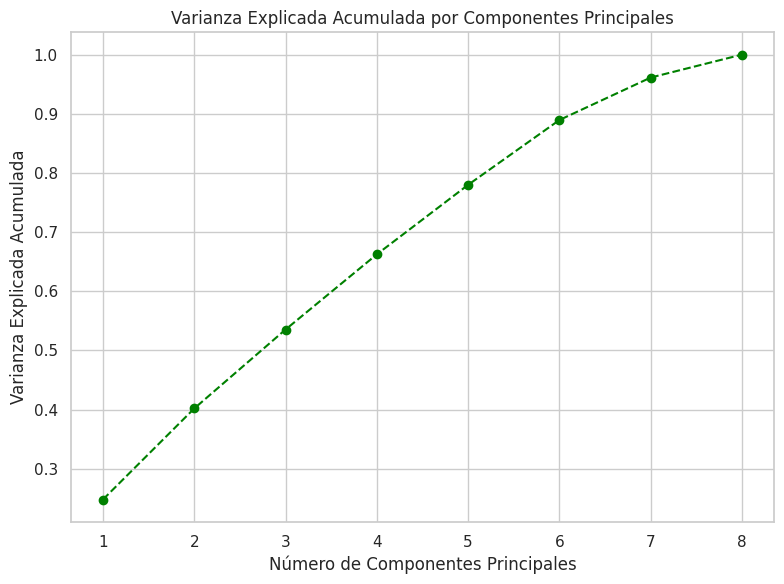

In [227]:
#Seleccionar solo las variables numéricas para el PCA
numeric_cols = ['danceability_%', 'valence_%', 'energy_%',
                'acousticness_%', 'instrumentalness_%',
                'liveness_%', 'speechiness_%', 'bpm']

# Estándarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Inicializar PCA con el número de componentes deseados
pca = PCA(n_components=len(numeric_cols))

# Aplicar PCA
pca.fit(scaled_data)

# Obtener las componentes principales
principal_components = pca.transform(scaled_data)

# Visualizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio.cumsum(), marker='o', linestyle='--', color='green')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## Fase 5: Presentación de Resultados

Visualización de datos:

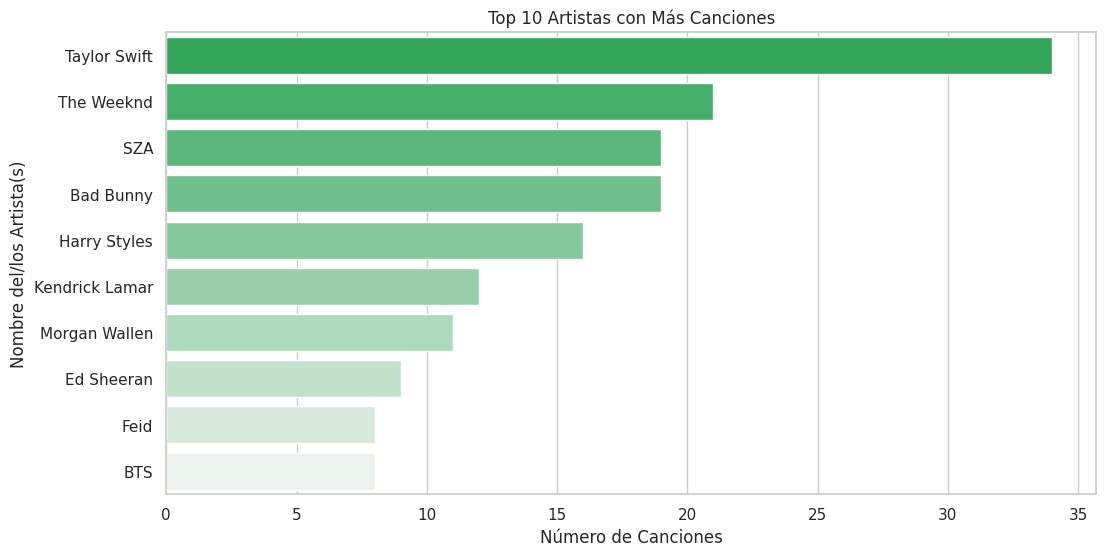

In [228]:
# Contamos las canciones por artista
mejores_artistas = df['artist(s)_name'].value_counts().head(10)

# Configuramos los colores
palette = sns.light_palette("#1DB954", n_colors=10, reverse=True)

plt.figure(figsize=(12, 6))

# Gráfica de barras
sns.barplot(
    x=mejores_artistas.values,
    y=mejores_artistas.index,
    palette=palette
)

plt.xlabel('Número de Canciones')
plt.ylabel('Nombre del/los Artista(s)')
plt.title('Top 10 Artistas con Más Canciones')

plt.show()

In [229]:
print("Los 10 artistas más escuchadas en 2023:")
mejores_artistas

Los 10 artistas más escuchadas en 2023:


artist(s)_name
Taylor Swift      34
The Weeknd        21
SZA               19
Bad Bunny         19
Harry Styles      16
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
Feid               8
BTS                8
Name: count, dtype: int64

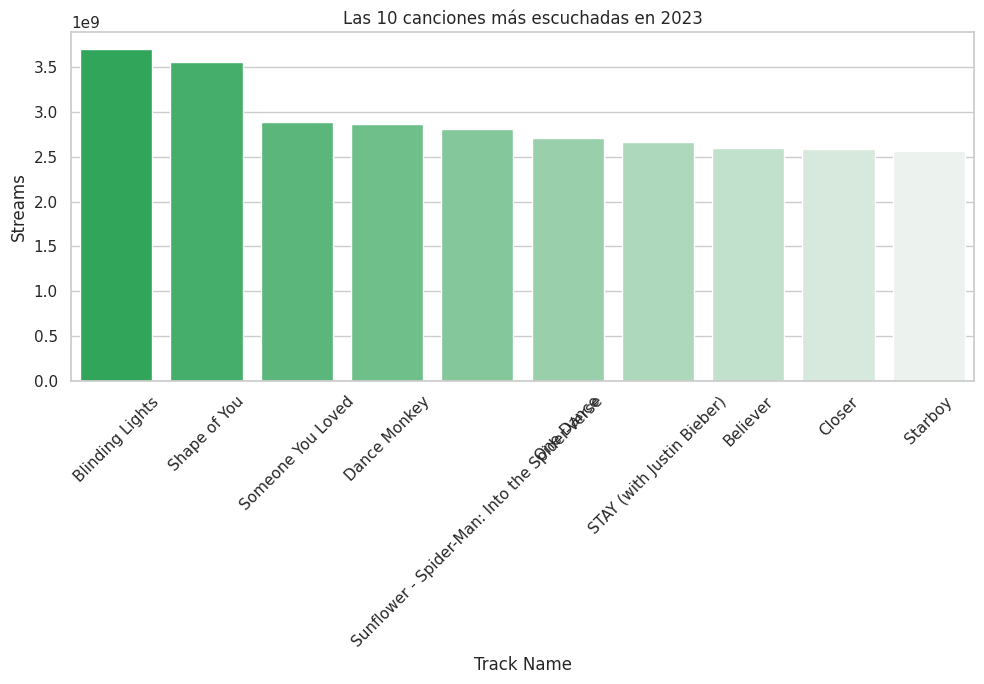

In [230]:
# Obtener las 10 canciones más reproducidas
top_10_songs = df.nlargest(10, 'streams') #seleccionamos las 10 filas con los valores más grandes

plt.figure(figsize=(10, 7))

# Configuramos la paleta de colores
palette = sns.light_palette("#1DB954", n_colors=10, reverse=True)

# Gráfico de barras
sns.barplot(
    x=top_10_songs.track_name,
    y=top_10_songs.streams,
    palette=palette
)

plt.title('Las 10 canciones más escuchadas en 2023')
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [231]:
print("Las 10 canciones más escuchadas en 2023:")
print(top_10_songs[['track_name', 'streams']])

Las 10 canciones más escuchadas en 2023:
                                        track_name     streams
55                                 Blinding Lights  3703895074
179                                   Shape of You  3562543890
86                               Someone You Loved  2887241814
620                                   Dance Monkey  2864791672
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550
162                                      One Dance  2713922350
84                       STAY (with Justin Bieber)  2665343922
140                                       Believer  2594040133
725                                         Closer  2591224264
48                                         Starboy  2565529693


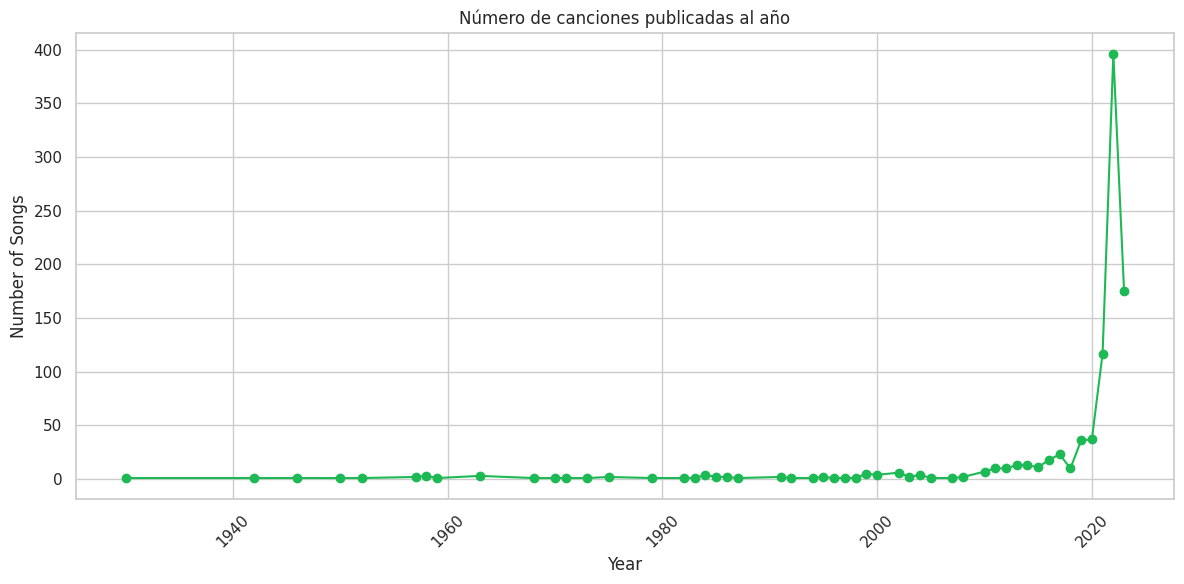

In [232]:
# Elegimos el color
spotify_green = '#1DB954'

# Convertimos a  datetime
df['date'] = pd.to_datetime(df['date'])

# Extraemos el año
df['released_year'] = df['date'].dt.year

# Agrupamos por año
songs_per_year = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Gráfica de líneas
plt.plot(songs_per_year.index, songs_per_year.values, marker='o', color=spotify_green)

plt.title('Número de canciones publicadas al año')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

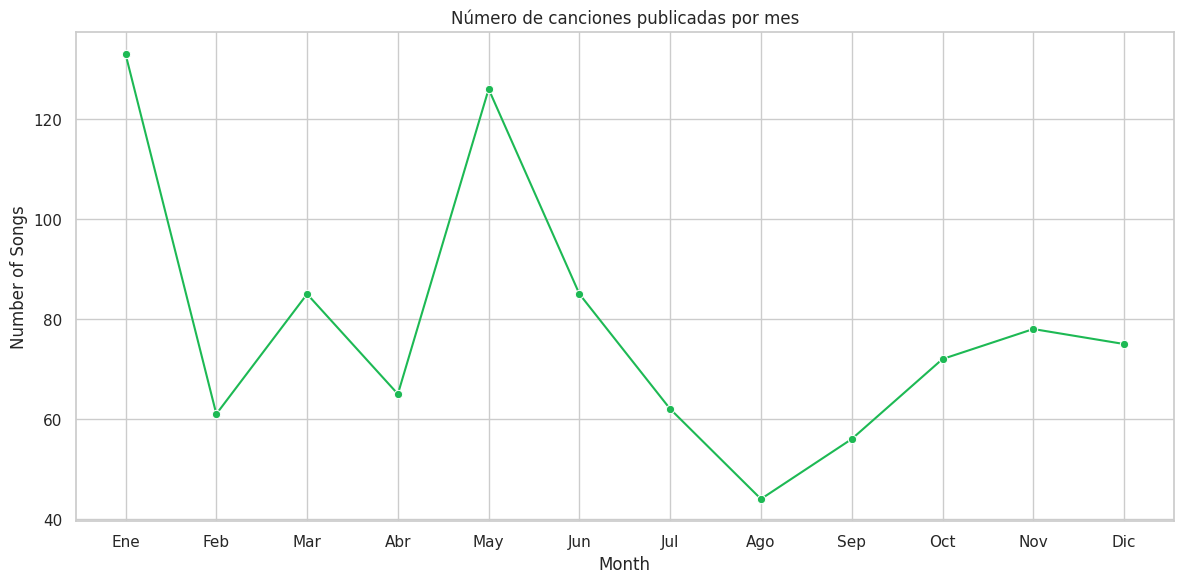

In [233]:
# Extraemos el mes
df['released_month'] = df['date'].dt.month

# Contamos el número de canciones por mes
songs_per_month = df['released_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Gráfica de líneas
sns.lineplot(x=songs_per_month.index, y=songs_per_month.values, marker='o', color='#1DB954')

plt.title('Número de canciones publicadas por mes')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.tight_layout()

plt.show()

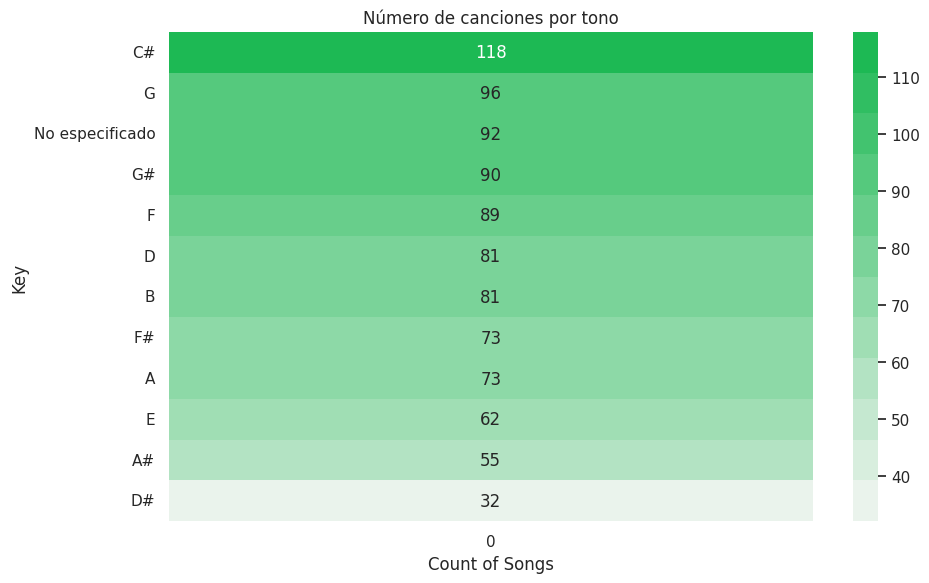

In [234]:
# Contamos el número de canciones por cada 'key'
key_counts = df['key'].value_counts()

# Ordenamos los valores de mayor a menor
key_counts_sorted = key_counts.sort_values(ascending=False)

# Matriz de recuento
key_matrix = key_counts_sorted.values.reshape(-1, 1)

plt.figure(figsize=(10, 6))

# Elegimos la paleta de colores
palette = sns.light_palette("#1DB954", n_colors=len(key_counts_sorted), reverse=False)

# Mapa de calor
sns.heatmap(key_matrix, cmap=palette, annot=True, fmt='d', yticklabels=key_counts_sorted.index)

plt.title('Número de canciones por tono')
plt.xlabel('Count of Songs')
plt.ylabel('Key')
plt.tight_layout()

plt.show()

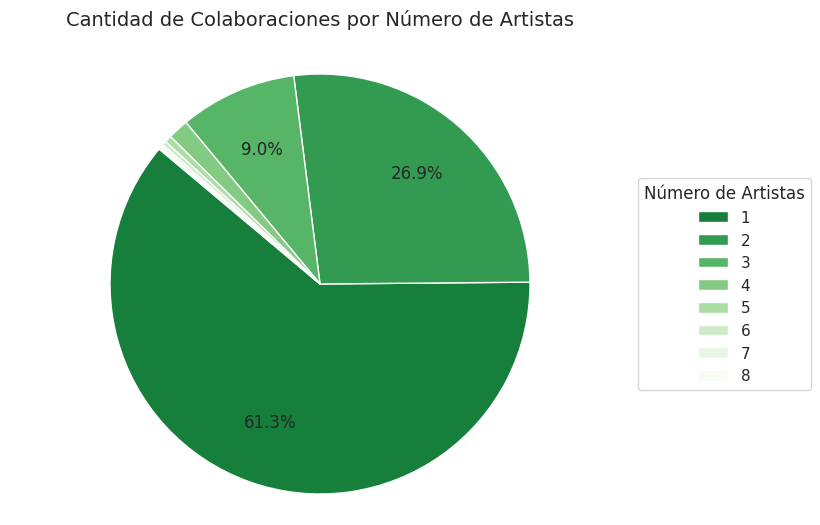

In [235]:
# Contamos las canciones por número de artistas
collaborations_count = df['artist_count'].value_counts()

# Agrupamos los casos con 4 o más artistas en una sola categoría
collaborations_count_grouped = collaborations_count.copy()
collaborations_count_grouped.loc[collaborations_count_grouped.index >= 4] = collaborations_count_grouped[collaborations_count_grouped.index >= 4].sum()

# Paleta de colores
num_colors = len(collaborations_count)
colors = plt.cm.Greens_r(np.linspace(0.2, 1, num_colors))

plt.figure(figsize=(8, 6))

# Función que decide si mostrar o no la etiqueta
def func(pct, allvals):
    if pct < 5:
        return ""
    else:
        return f"{pct:.1f}%"

wedges, texts, autotexts = plt.pie(collaborations_count, labels=['']*len(collaborations_count), autopct=lambda pct: func(pct, collaborations_count), #Se crea el gráfico
                          startangle=140, colors=colors, pctdistance=0.70)
plt.title('Cantidad de Colaboraciones por Número de Artistas', pad=20, fontsize=14)
plt.axis('equal')  # Gráfica sea un círculo

# Ocultamos las etiquetas de para las categorías agrupadas 4 o más
for autotext in autotexts:
    if autotext.get_text() == '':
        autotext.set_visible(False)

plt.legend(collaborations_count.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Número de Artistas')

centre_circle = plt.Circle((0,0),0.0,fc='white') #se añade un circulo en el centro
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [236]:
# Contar las colaboraciones por número de artistas
collaboration_counts = df['artist_count'].value_counts()

# Calcular los porcentajes
total_colaboraciones = len(df)  # Total de colaboraciones
porcentaje_colaboracion = (collaboration_counts / total_colaboraciones) * 100

# Crear un DataFrame para mostrar los resultados
tabla_porcentajes = pd.DataFrame({
    'Número de Colaboradores': porcentaje_colaboracion.index,
    'Porcentaje': porcentaje_colaboracion.values
})

# Ordenar por el número de colaboradores
tabla_porcentajes = tabla_porcentajes.sort_values(by='Número de Colaboradores')

# Mostrar la tabla
print(tabla_porcentajes)

   Número de Colaboradores  Porcentaje
0                        1   61.252654
1                        2   26.857749
2                        3    9.023355
3                        4    1.592357
4                        5    0.530786
5                        6    0.318471
6                        7    0.212314
7                        8    0.212314


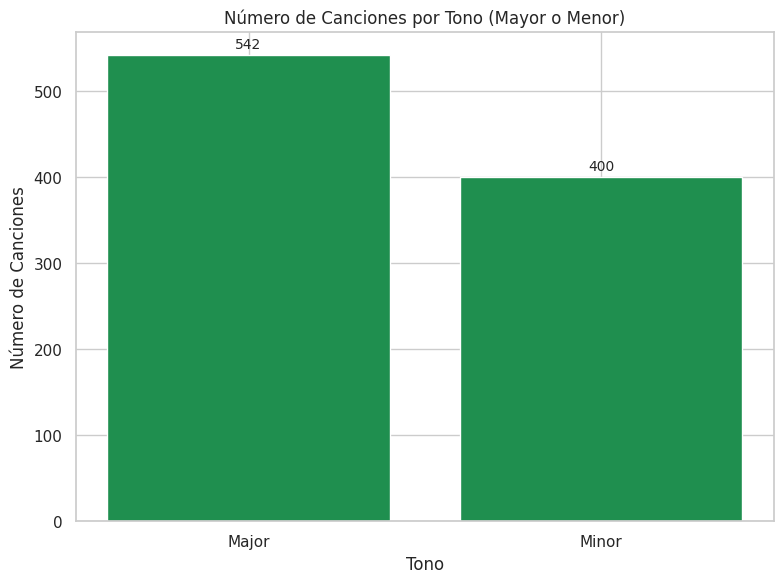

In [237]:
# Contamos el número de canciones por cada tono
mode_counts = df['mode'].value_counts()

plt.figure(figsize=(8, 6))

# Creamo la paleta de colores utilizando otro método
colors = [(0.12, 0.56, 0.31, 0.6), (0.12, 0.56, 0.31, 1.0)]
palette = sns.color_palette(colors, n_colors=len(mode_counts))

# Gráfica de barras
bars = plt.bar(mode_counts.index.astype(str), mode_counts.values, color=palette)


plt.xlabel('Tono')
plt.ylabel('Número de Canciones')
plt.title('Número de Canciones por Tono (Mayor o Menor)')

# Mostramos las etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Reportes y dashboards: https://lookerstudio.google.com/s/luUs4wrH16w